<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# GA Capstone: Fake News Classifier

Author: Tan Kai Yong Alvin

# Notebook 1-2: Generate Fake News (Unseen Dataset) Using GPT-2

In this section, we will generate a supplementary dataset consisting of 1000 lines of news (500 each of real and fake news). This dataset will be used as an independent dataset to further validate performance of the developed model.

The real news data were extracted (randomly selected 500) from the WELFake.csv [(Kaggle Source)](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification).

**Why GPT-2 language model?**

For the fake dataset, GPT-2 language model was used to formulate fake news set. GPT-2 is a language model was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text [(Source)](https://openai.com/blog/better-language-models/).

To use GPT-2 to formulate a fake news article, I will provide the model with an initial sentence comprising of 50 words. GPT-2 language model will then generate the entire fake news article using the initial sentence.

(This notebook is ran using google colab, due to incompatibility of packages used with project environment)

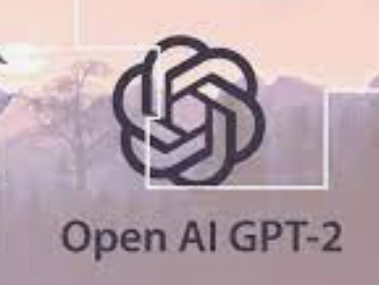

## Lbraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = 400

## Import

In [2]:
# import dataset
news_df = pd.read_csv('./datasets/WELFake_Dataset.csv', on_bad_lines='skip')

## Data Cleaning

In [3]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [4]:
# all news without title and/ or text are dropped
news_df = news_df.dropna()

In [5]:
news_df.drop(columns=['Unnamed: 0'], inplace =True)

In [6]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [7]:
news_df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called Sunshine. She...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",1
3,"Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid","A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save ...",0
4,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled ...",1
5,About Time! Christian Group Sues Amazon and SPLC for Designation as Hate Group,"All we can say on this one is it s about time someone sued the Southern Poverty Law Center!On Tuesday, D. James Kennedy Ministries (DJKM) filed a lawsuit against the Southern Poverty Law Center (SPLC), the charity navigation organization GuideStar, and Amazon, for defamation, religious discrimination, and trafficking in falsehood. The SPLC listed DJKM as a hate group, while GuideStar also ca...",1


In [8]:
real_alternate_df = news_df[(news_df['label'] == 0)]

In [9]:
fake_alternate_df = news_df[(news_df['label'] == 1)]

In [10]:
fake_alternate_df.head(20)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called Sunshine. She...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",1
4,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled ...",1
5,About Time! Christian Group Sues Amazon and SPLC for Designation as Hate Group,"All we can say on this one is it s about time someone sued the Southern Poverty Law Center!On Tuesday, D. James Kennedy Ministries (DJKM) filed a lawsuit against the Southern Poverty Law Center (SPLC), the charity navigation organization GuideStar, and Amazon, for defamation, religious discrimination, and trafficking in falsehood. The SPLC listed DJKM as a hate group, while GuideStar also ca...",1
6,DR BEN CARSON TARGETED BY THE IRS: “I never had an audit until I spoke at the National Prayer Breakfast.”,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENED WHEN HE SPOKE OUT AGAINST OBAMA:,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: “No evidence of anything” [Video],,1
8,Sports Bar Owner Bans NFL Games…Will Show Only ‘True American’ Sports: ‘I’d like to speak for rural America’ [Video],"The owner of the Ringling Bar, located south of White Sulphur Springs, is standing behind his Facebook post that criticizes NFL players who take a knee during the national anthem to protest police brutality. The post was made on the Ringling Bar s Facebook page Tuesday night and has since received hundreds of comments and shares. The post reads: The Ringling Bar will no longer show any NFL ga...",1
9,Latest Pipeline Leak Underscores Dangers Of Dakota Access Pipeline,"FILE – In this Sept. 15, 2005 file photo, the marker that welcomes commuters to Cushing, Okla. is seen. (AP Photo/The Oklahoman, Matt Strasen, File)\nUnderscoring once again the dangers of America’s unreliable fossil fuel infrastructure, a significant U.S. oil pipeline has been shut down after a leak was reported Monday morning.\nEnterprise Products Partners said Monday it had shut its Seaway ...",1
10,GOP Senator Just Smacked Down The Most Punchable Alt-Right Nazi On The Internet,"The most punchable Alt-Right Nazi on the internet just got a thorough beatdown from Sen. Ben Sasse (R-Neb.) on Twitter during an epic tweetstorm. Richard Spencer, the Alt-Right leader who has become a human punching bag, just got the racism smacked out of him by the Republican Senator on Thursday after the white nationalist tweeted that only goober conservatives blame Russia for racial divis...",1
13,WATCH: HILARIOUS AD Calls Into Question Health Of Aging Clinton Crime Family Bosses,"After watching this telling video, you ll wonder if instead of working so hard to get back into the White House, Hillary s time would be better spent looking into an assisted living situation for her and Bill",1


In [11]:
fake_alternate_df.replace(r'^\s+$', np.nan, regex=True, inplace = True)
fake_alternate_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called Sunshine. She...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",1
4,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled ...",1
5,About Time! Christian Group Sues Amazon and SPLC for Designation as Hate Group,"All we can say on this one is it s about time someone sued the Southern Poverty Law Center!On Tuesday, D. James Kennedy Ministries (DJKM) filed a lawsuit against the Southern Poverty Law Center (SPLC), the charity navigation organization GuideStar, and Amazon, for defamation, religious discrimination, and trafficking in falsehood. The SPLC listed DJKM as a hate group, while GuideStar also ca...",1
6,DR BEN CARSON TARGETED BY THE IRS: “I never had an audit until I spoke at the National Prayer Breakfast.”,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENED WHEN HE SPOKE OUT AGAINST OBAMA:,1
...,...,...,...
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her Delusion On Recount [Video],NaN,1
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS Used For Lavish Wedding Of “Spoiled Brat” Chelsea Clinton,"An email released by WikiLeaks on Sunday appears to show a former top aide to Bill Clinton arguing that an investigation into Clinton Foundation spending would show that Chelsea Clinton used foundation resources for her own wedding.The email, stolen from Clinton campaign Chairman John Podesta and published by WikiLeaks, shows a back-and-forth between Podesta and Doug Band, a former aide to Bil...",1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They are trying to silence you…It’s time to fight back!” [Video],"Judge Jeanine lets it rip! She s concerned with the silencing of conservative voices in America: https://www.youtube.com/watch?time_continue=1&v=kxa9F0s3aHsBERKELEY, CALIFORNIA MAYOR IS PART OF ANTIFA: Americans were stunned when they were told the police officers were allegedly told to stand down and allow violent Antifa and Democrat rioters to attack students who came to hear schedule spea...",1
72130,WATCH: Giuliani Demands That Democrats Apologize For Trump’s Racist Birtherism,"You know, because in fantasyland Republicans never questioned the citizenship of America s first black president.But that s exactly what they did for years and Donald Trump led the charge by going on or calling into Fox News every chance he could in order to demand President Obama s birth certificate.It was Trump who constantly claimed President Obama was born in Kenya even though Hawaii newsp...",1


In [12]:
generate_real = real_alternate_df.iloc[0:500, :]
generate_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3 to 1060
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   500 non-null    object
 1   text    500 non-null    object
 2   label   500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 15.6+ KB


In [13]:
generate_real.head()

,title,text,label
3,"Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid","A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save ...",0
11,"May Brexit offer would hurt, cost EU citizens - EU parliament","BRUSSELS (Reuters) - British Prime Minister Theresa May s offer of settled status for EU residents is flawed and will leave them with fewer rights after Brexit, the European Parliament s Brexit coordinator said on Tuesday. A family of five could face a bill of 360 pounds to acquire the new status, Guy Verhofstadt told May s Brexit Secretary David Davis in a letter seen by Reuters a very s...",0
12,Schumer calls on Trump to appoint official to oversee Puerto Rico relief,"WASHINGTON (Reuters) - Charles Schumer, the top Democrat in the U.S. Senate, called on President Donald Trump on Sunday to name a single official to oversee and coordinate relief efforts in hurricane-ravaged Puerto Rico. Schumer, along with Representatives Nydia Velàzquez and Jose Serrano, said a “CEO of response and recovery” is needed to manage the complex and ongoing federal response in the...",0
14,No Change Expected for ESPN Political Agenda Despite Huge Subscriber Decline - Breitbart,"As more and more sports fans turn off ESPN to protest the network’s social and political agenda, parent company Disney’s decision to extend current CEO Bob Iger’s contract through 2019 means the “world’s leader in sports entertainment” will continue on its merry way of alienating a large segment of Americans. [Breitbart reported in November that ESPN lost 3. 2 million subscribers in just ove...",0
15,Billionaire Odebrecht in Brazil scandal released to house arrest,"RIO DE JANEIRO/SAO PAULO (Reuters) - Billionaire Marcelo Odebrecht, the highest-profile executive imprisoned in Brazil s massive graft scandal, was released from jail on Tuesday to continue his sentence for corruption under house arrest, according to a federal court. The former chief executive officer of Odebrecht SA [ODBES.UL], Latin America s largest construction firm, was arrested in 2015 d...",0


In [14]:
generate_fake = fake_alternate_df.iloc[0:512, :]
generate_fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 973
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   512 non-null    object
 1   text    500 non-null    object
 2   label   512 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.0+ KB


In [15]:
generate_fake.dropna(subset=['text'], inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
generate_fake.reset_index(drop=True, inplace=True)

In [17]:
generate_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   500 non-null    object
 1   text    500 non-null    object
 2   label   500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [18]:
generate_fake.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called Sunshine. She...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",1
2,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled ...",1
3,About Time! Christian Group Sues Amazon and SPLC for Designation as Hate Group,"All we can say on this one is it s about time someone sued the Southern Poverty Law Center!On Tuesday, D. James Kennedy Ministries (DJKM) filed a lawsuit against the Southern Poverty Law Center (SPLC), the charity navigation organization GuideStar, and Amazon, for defamation, religious discrimination, and trafficking in falsehood. The SPLC listed DJKM as a hate group, while GuideStar also ca...",1
4,DR BEN CARSON TARGETED BY THE IRS: “I never had an audit until I spoke at the National Prayer Breakfast.”,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENED WHEN HE SPOKE OUT AGAINST OBAMA:,1
5,Sports Bar Owner Bans NFL Games…Will Show Only ‘True American’ Sports: ‘I’d like to speak for rural America’ [Video],"The owner of the Ringling Bar, located south of White Sulphur Springs, is standing behind his Facebook post that criticizes NFL players who take a knee during the national anthem to protest police brutality. The post was made on the Ringling Bar s Facebook page Tuesday night and has since received hundreds of comments and shares. The post reads: The Ringling Bar will no longer show any NFL ga...",1
6,Latest Pipeline Leak Underscores Dangers Of Dakota Access Pipeline,"FILE – In this Sept. 15, 2005 file photo, the marker that welcomes commuters to Cushing, Okla. is seen. (AP Photo/The Oklahoman, Matt Strasen, File)\nUnderscoring once again the dangers of America’s unreliable fossil fuel infrastructure, a significant U.S. oil pipeline has been shut down after a leak was reported Monday morning.\nEnterprise Products Partners said Monday it had shut its Seaway ...",1
7,GOP Senator Just Smacked Down The Most Punchable Alt-Right Nazi On The Internet,"The most punchable Alt-Right Nazi on the internet just got a thorough beatdown from Sen. Ben Sasse (R-Neb.) on Twitter during an epic tweetstorm. Richard Spencer, the Alt-Right leader who has become a human punching bag, just got the racism smacked out of him by the Republican Senator on Thursday after the white nationalist tweeted that only goober conservatives blame Russia for racial divis...",1
8,WATCH: HILARIOUS AD Calls Into Question Health Of Aging Clinton Crime Family Bosses,"After watching this telling video, you ll wonder if instead of working so hard to get back into the White House, Hillary s time would be better spent looking into an assisted living situation for her and Bill",1
9,BRITISH WOMAN LOSES VIRGINITY To Asylum Seeking Rapist On Her Way To Church,"Europe is likely not going to be a top destination for famili

## GPT-2 Set-up (Installation of Required Packages)

In [19]:
#!git clone https://github.com/openai/gpt-2.git

In [20]:
cd gpt-2

/content/gpt-2


In [21]:
#!pip3 install -r requirements.txt

In [22]:
#!python3 download_model.py 345M

In [23]:
cd src

/content/gpt-2/src


In [24]:
#pip uninstall tensorflow

In [25]:
#pip install tensorflow==1.15.2

## Import (For GPT-2)

In [26]:
import json
import os
import tensorflow as tf
import model, sample, encoder

In [27]:
generate_fake['text']

0      No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She...
1                                                                                                                                                                                              Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change.    Loretta Lynch aka Eric Holder in a skirt
2      The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of a

In [28]:
generate_fake['text'][100]# show sample text before processing

'We often hear about the  liberal media s  attempts to swing everything to the left. This myth of media bias is often repeated on Fox News, on right-wing blogs, and basically anywhere conservatives gather. The  liberal media,  according to them, seeks to destroy everything good and pure   like the right to discriminate against  the gays  and  the blacks,  and impose a Christofascist theocracy on our nation. According to legend, the most  liberal  of the 24-hour news networks is MSNBC.Unfortunately, even MSNBC seems to be shifting to the Right lately. On Monday, the news network deleted a clip that was unfavorable to, of all people, Ted Cruz.The clip in question was from Sunday s edition of Meet the Press, and featured host Chuck Todd expressing nothing short of disgust as Cruz spoke. In the clip, as Cruz compares recently-deceased hatemonger and Supreme Court Justice, Antonin Scalia, to Ronald Reagan. Todd can be heard, almost imperceptibly, muttering  Oh god  as Cruz makes the compari

In [29]:
first_sentence_list = []
for _ in generate_fake['text']:
    first_sentence = ''
    first_sentence += ' '.join(_.split()[:50])
    first_sentence_list.append(first_sentence)
generate_fake['first_sentence'] = first_sentence_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Text Generation

In [30]:
cd ..

/content/gpt-2


In [31]:
model_name='345M'
seed=42
nsamples=1
batch_size=1
length=None
temperature=1.0
top_k=40
models_dir = '/content/gpt-2/models'

models_dir = os.path.expanduser(os.path.expandvars(models_dir))
if batch_size is None:
    batch_size = 1
assert nsamples % batch_size == 0

enc = encoder.get_encoder(model_name, models_dir)
hparams = model.default_hparams()
with open(os.path.join(models_dir, model_name, 'hparams.json')) as f:
    hparams.override_from_dict(json.load(f))

if length is None:
    length = hparams.n_ctx // 2
elif length > hparams.n_ctx:
    raise ValueError("Can't get samples longer than window size: %s" % hparams.n_ctx)

with tf.Session(graph=tf.Graph()) as sess:
    context = tf.placeholder(tf.int32, [batch_size, None])
    np.random.seed(seed)
    tf.set_random_seed(seed)
    output = sample.sample_sequence(
        hparams=hparams, length=length,
        context=context,
        batch_size=batch_size,
        temperature=temperature, top_k=top_k
    )

    saver = tf.train.Saver()
    ckpt = tf.train.latest_checkpoint(os.path.join(models_dir, model_name))
    saver.restore(sess, ckpt)
    
    real_news_titles = []
    fake_news = []
    
    for index, raw_text in enumerate(generate_fake['first_sentence'][0:]):
      print('processing', index, 'of', len(generate_fake['first_sentence'][0:]))
      context_tokens = enc.encode(raw_text)
      generated = 0
      for _ in range(nsamples // batch_size):
          out = sess.run(output, feed_dict={
              context: [context_tokens for _ in range(batch_size)]
          })[:, len(context_tokens):]
          for i in range(batch_size):
              generated += 1
              text = enc.decode(out[i])
              fake_news.append(text)
              real_news_titles.append(raw_text)
              
              df = pd.DataFrame([real_news_titles, fake_news]).T
              df.columns = ['real_news titles', 'fake_news']
              df.to_csv('../datasets/generate_fake_news.csv')





Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.random.categorical` instead.


processing 0 of 500
processing 1 of 500
processing 2 of 500
processing 3 of 500
processing 4 of 500
processing 5 of 500
processing 6 of 500
processing 7 of 500
processing 8 of 500
processing 9 of 500
processing 10 of 500
processing 11 of 500
processing 12 of 500
processing 13 of 500
processing 14 of 500
processing 15 of 500
processing 16 of 500
processing 17 of 500
processing 18 of 500
processing 19 of 500
processing 20 of 500
processing 21 of 500
processing 22 of 500
processing 23 of 500
processing 24 of 500
processing 25 of 500
processing 26 of 500
processing 27 of 500
processing 28 of 500
processing 29 of 500
processing 30 of 500
processing 31 of 500
processing 32 of 500
processing 33 of 500
processing 34 of 500
processing 35 of 500
processing 36 of 500
processing 37 of 500
processing 38 of 500
processing 39 of 500
processing 40 of 500
processing 41 of 500
processing 42 of 500
processing 43 of 500
processing 44 of 500
processing 45 of 500
processing 46 of 500
processing 47 of 500
pr

## Cleaning Validation Dataset

In [32]:
# merge generated text with generate_fake dataframe based on index
generate_fake.merge(df, left_index=True, right_index=True, how='inner')

,title,text,label,first_sentence,real_news titles,fake_news
0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called Sunshine. She...,1,No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message,No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message,"to our leaders we should stop trying to bring about a black revolution without killing whites and cops. The hosts of Fox & Friends did not seem to notice what they were broadcasting.\n\nWhile the show had already begun to talk about the potential for racial unrest on college campuses all day long, they finally started talking about what to do on a college campus that might be under attack.\n\..."
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",1,"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt","Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",", was making her way onto the stage in an ""All Out F–k You Black Men"" manner. However, at a pre-dressed stage, the lady who is supposed to be Secretary of State had her own agenda and was not present today. This is why so much has been made about the Lynch meeting.<|endoftext|>The most basic way to understand this is you are buying an electric car to buy another electric car which means that a..."
2,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled ...",1,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful","The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful","as the world bomb – to targets over the next few years. And the missiles can stay deployed long enough to damage satellites, ICBMs and aircraft up to 500 times faster t

In [37]:
generate_fake = generate_fake.merge(df, left_index=True, right_index=True, how='inner')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             500 non-null    object
 1   text              500 non-null    object
 2   label             500 non-null    int64 
 3   first_sentence    500 non-null    object
 4   real_news titles  500 non-null    object
 5   fake_news         500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


In [41]:
generate_fake['title_text'] = generate_fake['title'] + ' ' + generate_fake['real_news titles'] + ' ' + generate_fake['fake_news']

In [39]:
generate_fake.drop(columns=['label', 'text'], inplace =True)
generate_fake['label'] = 1

In [43]:
generate_fake.head()

,title,first_sentence,real_news titles,fake_news,title_text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO],No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message,No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people and cops to send a message,"to our leaders we should stop trying to bring about a black revolution without killing whites and cops. The hosts of Fox & Friends did not seem to notice what they were broadcasting.\n\nWhile the show had already begun to talk about the potential for racial unrest on college campuses all day long, they finally started talking about what to do on a college campus that might be under attack.\n\...",LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO] No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to turn the tide and kill white people a...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO],"Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt","Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt",", was making her way onto the stage in an ""All Out F–k You Black Men"" manner. However, at a pre-dressed stage, the lady who is supposed to be Secretary of State had her own agenda and was not present today. This is why so much has been made about the Lynch meeting.<|endoftext|>The most basic way to understand this is you are buying an electric car to buy another electric car which means that a...","UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO] Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change. Loretta Lynch aka Eric Holder in a skirt , was making her way onto the stage in an ""Al...",1
2,SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice,"The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful","The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful","as the world bomb – to targets over the next few years. And the missiles can stay deployed long enough to damage satellites, ICBMs and aircraft up to 500 times faster than traditional atomic weapons The Russian Navy will not need to launch a warhead from its submarine base in the Mediterranean Sea to defend its territory From there, the missiles will be launched from coas

In [55]:
# export
generate_fake.to_csv('../datasets/generate_fake.csv', index=False)

In [53]:
generate_fake.drop(columns=['title', 'first_sentence', 'real_news titles', 'fake_news'], inplace =True)

In [54]:
generate_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title_text  500 non-null    object
 1   label       500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [47]:
generate_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3 to 1060
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   500 non-null    object
 1   text    500 non-null    object
 2   label   500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 15.6+ KB


In [48]:
generate_real['title_text'] = generate_real['title'] + ' ' + generate_real['text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
generate_real.drop(columns=['label', 'text'], inplace =True)
generate_real['label'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
generate_real.reset_index(drop=True, inplace=True)

In [56]:
generate_real.drop(columns=['title'], inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
# Combine dataframes
val_df = pd.concat([generate_real, generate_fake])

In [58]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title_text  1000 non-null   object
 1   label       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [59]:
val_df

,title_text,label
0,"Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical ...",0
1,"May Brexit offer would hurt, cost EU citizens - EU parliament BRUSSELS (Reuters) - British Prime Minister Theresa May s offer of settled status for EU residents is flawed and will leave them with fewer rights after Brexit, the European Parliament s Brexit coordinator said on Tuesday. A family of five could face a bill of 360 pounds to acquire the new status, Guy Verhofstadt told May s Brexit...",0
2,"Schumer calls on Trump to appoint official to oversee Puerto Rico relief WASHINGTON (Reuters) - Charles Schumer, the top Democrat in the U.S. Senate, called on President Donald Trump on Sunday to name a single official to oversee and coordinate relief efforts in hurricane-ravaged Puerto Rico. Schumer, along with Representatives Nydia Velàzquez and Jose Serrano, said a “CEO of response and reco...",0
3,"No Change Expected for ESPN Political Agenda Despite Huge Subscriber Decline - Breitbart As more and more sports fans turn off ESPN to protest the network’s social and political agenda, parent company Disney’s decision to extend current CEO Bob Iger’s contract through 2019 means the “world’s leader in sports entertainment” will continue on its merry way of alienating a large segment of Ameri...",0
4,"Billionaire Odebrecht in Brazil scandal released to house arrest RIO DE JANEIRO/SAO PAULO (Reuters) - Billionaire Marcelo Odebrecht, the highest-profile executive imprisoned in Brazil s massive graft scandal, was released from jail on Tuesday to continue his sentence for corruption under house arrest, according to a federal court. The former chief executive officer of Odebrecht SA [ODBES.UL], ...",0
...,...,...
495,"Conservative Texas Lt. Governor Tweets Vile Bible Verse After Mass Shooting In LGBT Club Conservatives are already praising God for the murder of 20 or more people at an LGBT night club in Orlando, Florida.On Saturday night, a gunman walked into the club with an assault rifle and began shooting people. So far, at least 20 are confirmed dead but police say the death toll is likely to rise. ""I...",1
496,"Comment on Mass Fish Deaths: Millions Have Been Found Dead All Over The World In The Past Month by Whackamole Mass Fish Deaths: Millions Have Been Found Dead All Over The World In The Past Month May 20th, 2014 Millions of fish are suddenly dying all over the planet. In fact, there have been dozens of mass fish death events reported in the past month alone. So why is this happening? One major ...",1
497,"Trump Has NEVER Looked So Incompetent; His China Adviser Was Literally Found On Amazon (DETAILS) With every new detail revealing itself about Donald Trump s administration, the humiliation that America is enduring is getting harder and harder to stomach. We have never seen an administration fail so hard from the start, and just when it seems it can get no worse, Trump sets a new tone for the...",1
498,"Is This Why Comey Broke: A Stack Of Resignation Letters From Furious FBI Agents Is This Why Comey Broke: A Stack Of Resignation Letters From Furious FBI Agents Source: Zero Hedge Conspiracy theories have swirled in recent days as to why FBI Director James Comey reopened Hillary's email investigation after just closing it back in July concluding that, although Hillary had demonstrated gross neg...",1


## Save to csv

In [62]:
val_df.to_csv('../datasets/val_df.csv', index=False)